In [1]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from PIL import Image
from tqdm import tqdm

%matplotlib inline

In [2]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [3]:
# load the files
houselist = glob.glob('HousesDataset/*.jpg')

image_data = []
for fname in houselist:
    image_name = fname.split('\\')[1].split('.')[0]
    image_data.append((image_name, Image.open(fname)))
    pass

text_data = pd.read_csv('HousesDataset/HousesInfo.txt', sep=' ',
                        names=["nBeds", "nbaths", "area", "zipcode", "price"])

In [4]:
image_same_size = []
for name, image in tqdm(image_data):
    image_same_size.append((name, image.resize((300, 300))))

100%|█████████████████████████████████████████████████████████████████████████████| 2140/2140 [00:17<00:00, 100.70it/s]


In [4]:
row, col = 30, 30
X = np.zeros((535, row, col, 12)).astype(int)
for name, image in tqdm(image_data):
    index, room = name.split('_')
    if room == "bathroom":
        X[int(index) - 1, :, :, 0:3] = np.array(image.resize((row, col)))
    elif room == "bedroom":
        X[int(index) - 1, :, :, 3:6] = np.array(image.resize((row, col)))
    elif room == "frontal":
        X[int(index) - 1, :, :, 6:9] = np.array(image.resize((row, col)))
    else:
        X[int(index) - 1, :, :, 9:12] = np.array(image.resize((row, col)))

100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 2140/2140 [00:17<00:00, 125.46it/s]


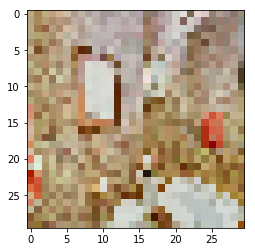

In [6]:
plt.imshow(X[0, :, :, 0:3])

In [7]:
text_array = np.zeros((535, 5))
for i, text in text_data.iterrows():
    text_array[i] = text.values

In [9]:
y = text_array[:, -1]
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(row, col, 12)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='linear'))

model.compile(loss=keras.losses.mean_squared_error,
              optimizer=keras.optimizers.Adadelta())

model.fit(x_train, y_train,
          batch_size=1,
          epochs=100,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)

Instructions for updating:
Use tf.cast instead.
Train on 358 samples, validate on 177 samples
Epoch 1/100
358/358 [==============================] - 6s 17ms/step - loss: 278069234158.9595 - val_loss: 311163207740.6328
Epoch 2/100
358/358 [==============================] - 2s 5ms/step - loss: 249430098318.9888 - val_loss: 313461764403.1638
Epoch 3/100
358/358 [==============================] - 2s 5ms/step - loss: 255509689924.2486 - val_loss: 311456478891.2486
Epoch 4/100
358/358 [==============================] - 2s 5ms/step - loss: 258254043705.0970 - val_loss: 310912107247.5918
Epoch 5/100
358/358 [==============================] - 2s 5ms/step - loss: 254938161974.9401 - val_loss: 311429617430.5922
Epoch 6/100
358/358 [==============================] - 2s 5ms/step - loss: 247157130786.7019 - val_loss: 320537887210.0283
Epoch 7/100
358/358 [==============================] - 2s 5ms/step - loss: 249148789883.7926 - val_loss: 311261174400.0113
Epoch 8/100
358/358 [=======================